In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import wordcloud

# Set a clean and minimalist style
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 10, 'font.family': 'sans-serif'})

# Choose a soft, muted color palette
sns.set_palette('muted')

In [2]:
all_files = [f"./MyData_streaming_hist/endsong_{i}.json" for i in range(12)]
df_list = [pd.read_json(file) for file in all_files]
df = pd.concat(df_list, ignore_index=True)


In [3]:
df.ts = pd.to_datetime(df.ts)
df = df.sort_values(by='ts').reset_index(drop = True)

In [22]:
df.columns

Index(['ts', 'username', 'platform', 'ms_played', 'conn_country',
       'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')

/var/folders/wm/6y1bhz7x0ml90h2rz18zmclm0000gn/T/ipykernel_91126/1641122460.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df.groupby(by = df.ts.dt.to_period('M')).count().ts.plot(title='Count of songs')


<Axes: title={'center': 'Count of songs'}, xlabel='ts'>

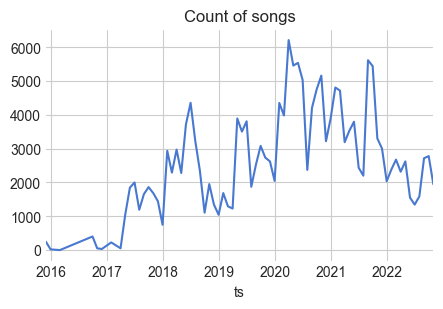

In [29]:
df.groupby(by = df.ts.dt.to_period('M')).count().ts.plot(title='Count of songs')


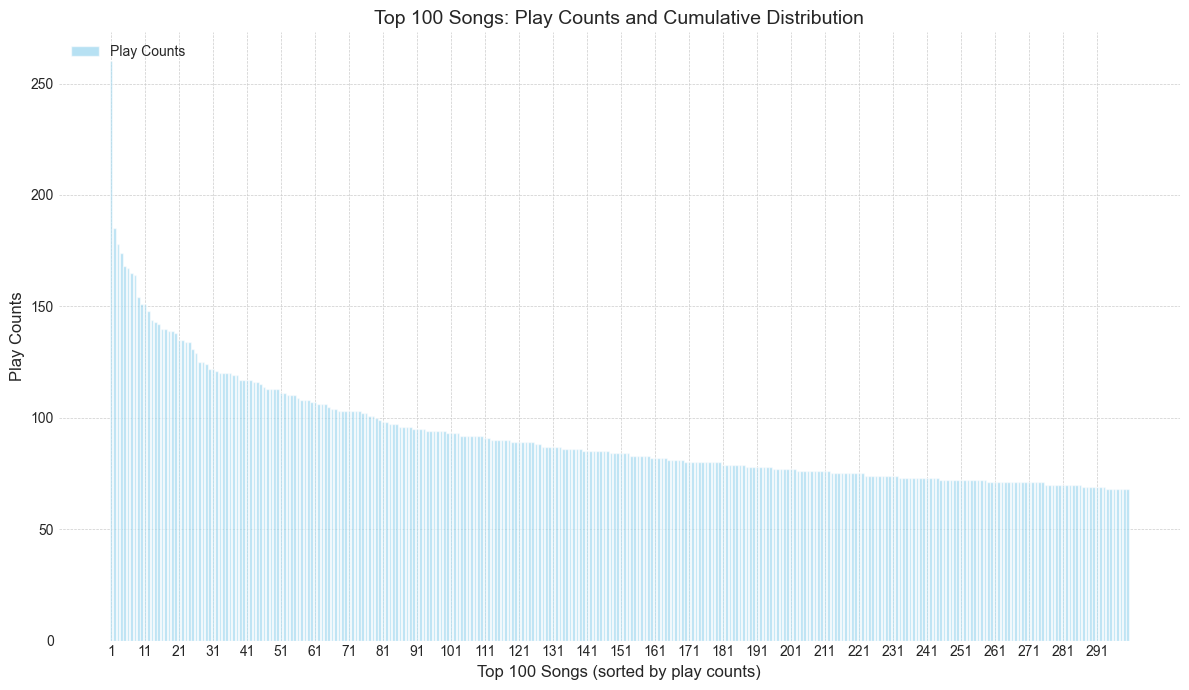

spotify_track_uri
spotify:track:6O7qFEXmLQcOsV37wrgJDz    260
spotify:track:58OfWRKJLK1PGe81t4Hxl8    185
spotify:track:0bXpmJyHHYPk6QBFj25bYF    178
spotify:track:2uXidnW2mwi9kk4ZWVr0n5    174
spotify:track:3W0RA0TPPrBW5gRAZvADKs    168
                                       ... 
spotify:track:5xwzmfxNAxZwMjznQ0eVXL     68
spotify:track:2AT8iROs4FQueDv2c8q2KE     68
spotify:track:3mRLHiSHYtC8Hk7bzZdUs1     68
spotify:track:3zBWN2RILlV8RshkKvQsW8     68
spotify:track:6Ns2JyCa5xtANadq8gJ67u     68
Name: count, Length: 300, dtype: int64

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming song_play_counts is already calculated
song_play_counts = df['spotify_track_uri'].value_counts().sort_values(ascending=False)

# Focus on the top N songs for a cleaner graph
top_n = 300
top_song_play_counts = song_play_counts.head(top_n)

# Calculate cumulative percentage for the top N songs
cumulative_counts_top_n = np.cumsum(top_song_play_counts)
cumulative_percentage_top_n = cumulative_counts_top_n / cumulative_counts_top_n.iloc[-1] * 100

# Plot setup
plt.figure(figsize=(12, 7))
songs = range(len(top_song_play_counts))

# Play counts
plt.bar(songs, top_song_play_counts, color='skyblue', label='Play Counts', alpha=0.6)



# Labels and titles
plt.title('Top 100 Songs: Play Counts and Cumulative Distribution', fontsize=14)
plt.xlabel('Top 100 Songs (sorted by play counts)', fontsize=12)
plt.ylabel('Play Counts', fontsize=12)
plt.xticks(ticks=np.arange(0, top_n, 10), labels=np.arange(1, top_n+1, 10))  # Show only every 10th song for clarity

# Legend
lines, labels = plt.gca().get_legend_handles_labels()

plt.legend(lines, labels, loc='upper left', fontsize=10)

plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()

top_song_play_counts

<Axes: xlabel='ts', ylabel='hour'>

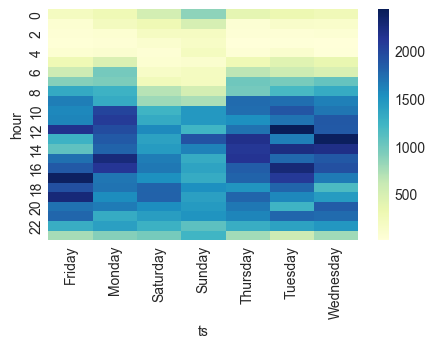

In [68]:
# Assuming df has a datetime column 'ts' for when songs were played
df['hour'] = df['ts'].dt.hour
heatmap_data = df.groupby(['hour', df['ts'].dt.day_name()])['master_metadata_track_name'].count().unstack()
sns.heatmap(heatmap_data, cmap="YlGnBu")

(-0.5, 799.5, 399.5, -0.5)

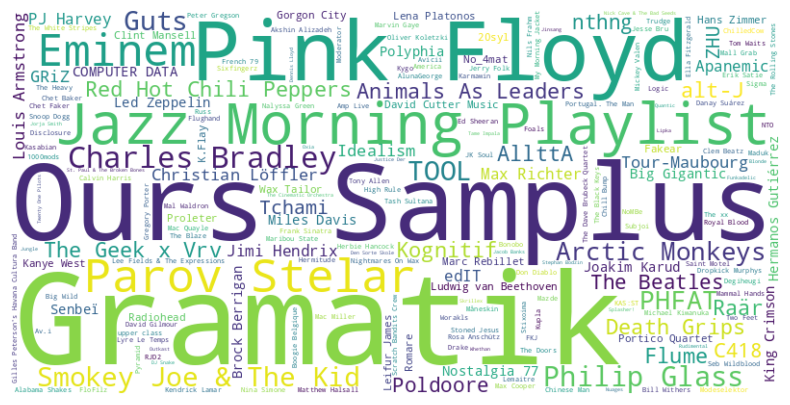

In [72]:
from wordcloud import WordCloud

# Generate a word cloud image for artists
artist_counts = df['master_metadata_album_artist_name'].value_counts().to_dict()
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(artist_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [74]:
# This requires preprocessing to extract collaborations and build a graph
import networkx as nx

# Assuming 'collaborations' is a DataFrame with columns 'artist1' and 'artist2'
G = nx.from_pandas_edgelist(collaborations, 'artist1', 'artist2')
pos = nx.spring_layout(G, seed=7)  # For consistent layout
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray')

NameError: name 'collaborations' is not defined

In [76]:
# Assuming df has 'ts' as datetime and 'play_count' as the number of times songs were played
pivot_df = df.pivot_table(index='ts', columns='master_metadata_album_artist_name', values='ts', aggfunc='sum').fillna(0)
pivot_df.cumsum().plot(figsize=(10, 6))

ValueError: Grouper for 'ts' not 1-dimensional

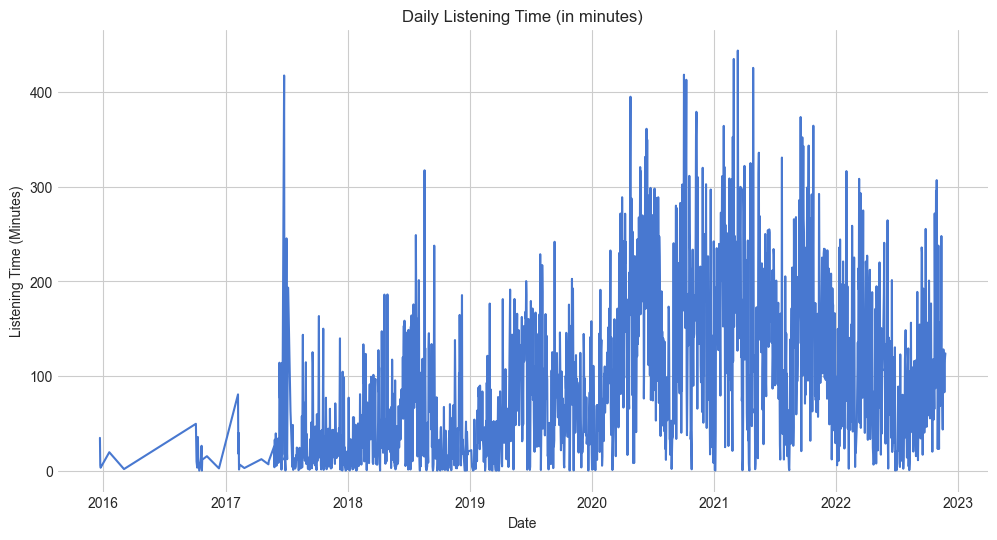

In [78]:
df['ts'] = pd.to_datetime(df['ts'])
df['date'] = df['ts'].dt.date
daily_listening_time = df.groupby('date')['ms_played'].sum() / (1000 * 60 )  # Convert milliseconds to minutes

plt.figure(figsize=(12, 6))
daily_listening_time.plot(kind='line')
plt.title('Daily Listening Time (in minutes)')
plt.xlabel('Date')
plt.ylabel('Listening Time (Minutes)')
plt.grid(True)
plt.show()

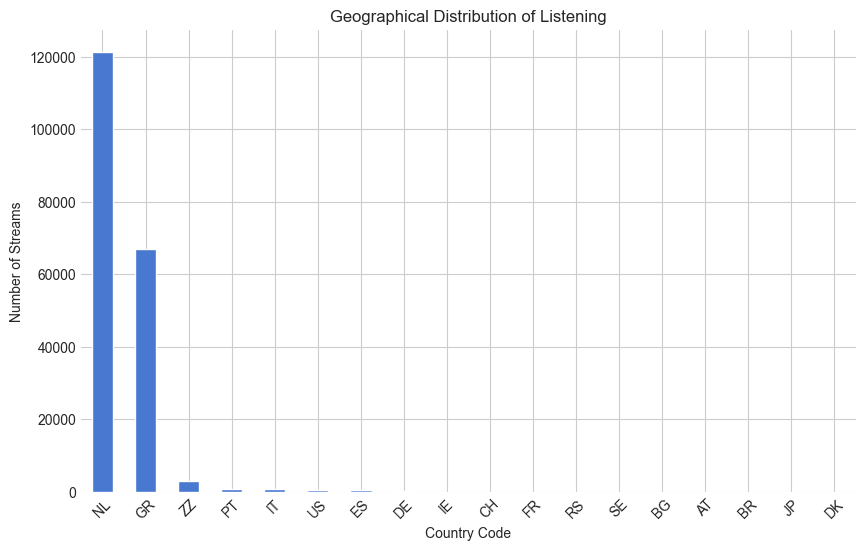

In [80]:
country_counts = df['conn_country'].value_counts()

plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.title('Geographical Distribution of Listening')
plt.xlabel('Country Code')
plt.ylabel('Number of Streams')
plt.xticks(rotation=45)
plt.show()

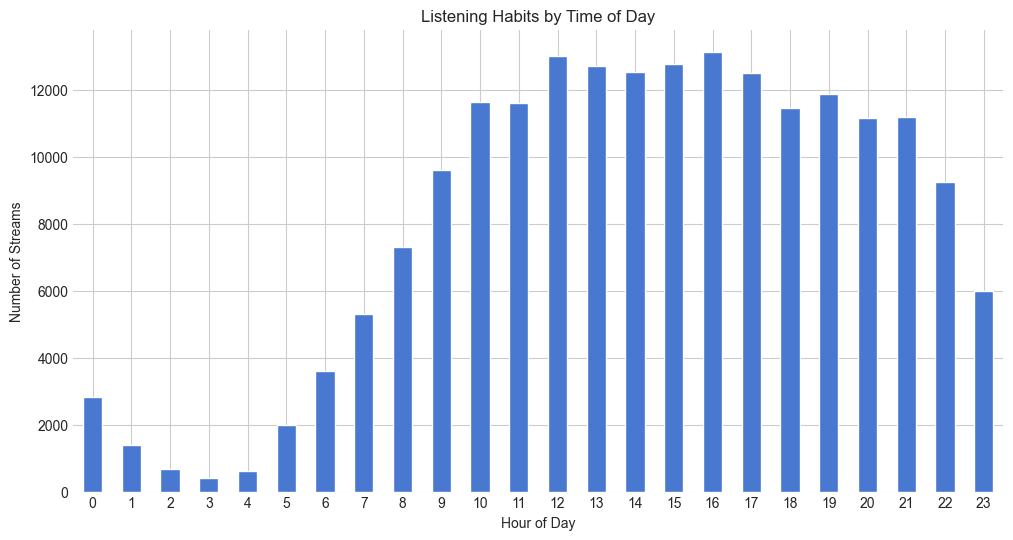

In [81]:
df['hour'] = df['ts'].dt.hour
hourly_listening = df.groupby('hour')['ms_played'].count()

plt.figure(figsize=(12, 6))
hourly_listening.plot(kind='bar')
plt.title('Listening Habits by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Streams')
plt.xticks(rotation=0)
plt.show()

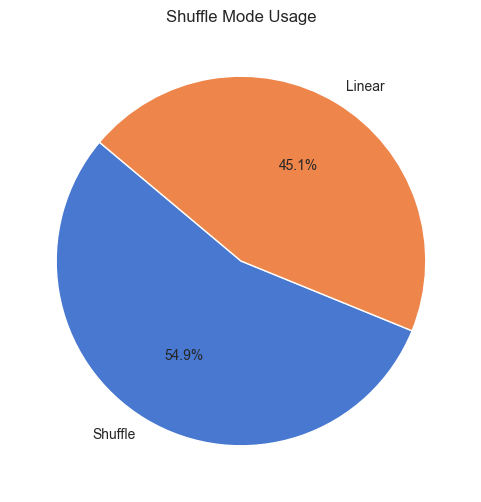

In [82]:
shuffle_usage = df['shuffle'].value_counts()

plt.figure(figsize=(6, 6))
shuffle_usage.plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=['Shuffle', 'Linear'])
plt.title('Shuffle Mode Usage')
plt.ylabel('')  # Hide the y-label as it's not needed for pie charts
plt.show()

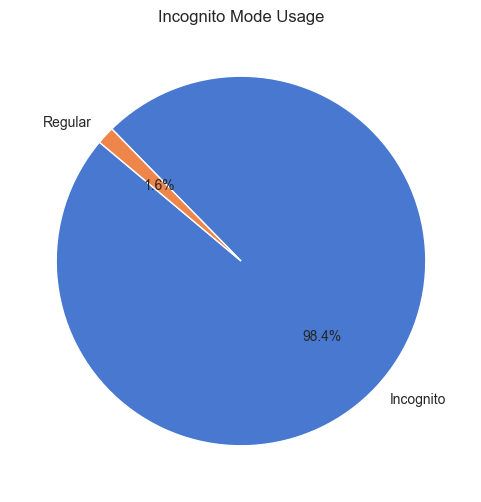

In [83]:
incognito_usage = df['incognito_mode'].value_counts()

plt.figure(figsize=(6, 6))
incognito_usage.plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=['Incognito', 'Regular'])
plt.title('Incognito Mode Usage')
plt.ylabel('')
plt.show()